In [4]:
import pickle
import os
import scipy
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [8]:
path = 'predictions/sentence-transformers/all-MiniLM-L6-v2//'
with open(os.path.join(path,'preds.pkl'), 'rb') as f:
    predicted = pickle.load(f)
    predicted = np.squeeze(np.stack(predicted))
    f.close
with open(os.path.join(path,'labels.pkl'), 'rb') as f:
    labels = pickle.load(f)
    labels = np.squeeze(np.stack(labels))
    f.close
# chance = scipy.special.softmax(np.random.rand((311*3)).reshape((311,3)), axis=1)
pred_normalised = scipy.special.softmax(predicted, axis=1)

In [154]:
results(predicted, labels)

JSD
0.27227476
KL
0.4564637
acc
0.5144694533762058


In [232]:
def kl(ps, qs):
    # p is true, q is pred
    return stats.entropy(pk = ps, qk = qs, axis=1)
def jsd (ps, qs):
    ms = 0.5*(ps+qs)
    d_p = stats.entropy(pk = ps, qk = ms, axis=1)
    d_q = stats.entropy(pk = qs, qk = ms, axis=1)
    mean = 0.5*(d_p + d_q)
    return np.sqrt(mean)
def results(predicted, labels):
    total = len(predicted)
    pred_normalised = scipy.special.softmax(predicted, axis=1)
    
    print('JSD')
    print(np.mean(jsd(labels, pred_normalised)))
    print('KL')
    print(np.mean(kl(labels, pred_normalised)))
    print('acc')
    print(np.sum(np.argmax(pred_normalised, axis=1) == np.argmax(labels, axis=1)) / len(labels))

In [229]:
path = 'model/mpnet_R2_soft_soft/'
path = os.path.join(path, 'eval/accuracy_evaluation_results.csv')
acc = pd.read_csv(path)
last = acc[acc['epoch']==0].iloc[-1].name
acc = acc.iloc[last:].copy()

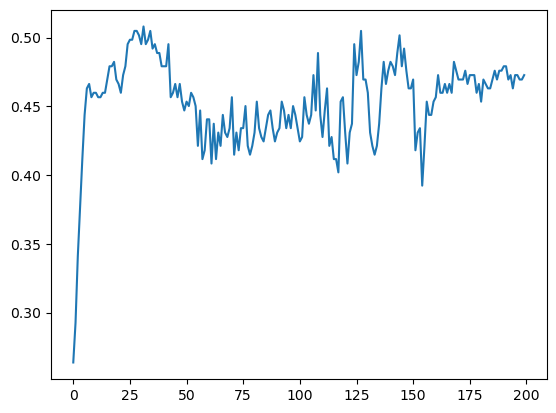

In [199]:
plt.plot(acc['epoch'],acc['accuracy'])

In [230]:
np.mean(acc['accuracy'])

0.4762379421221865

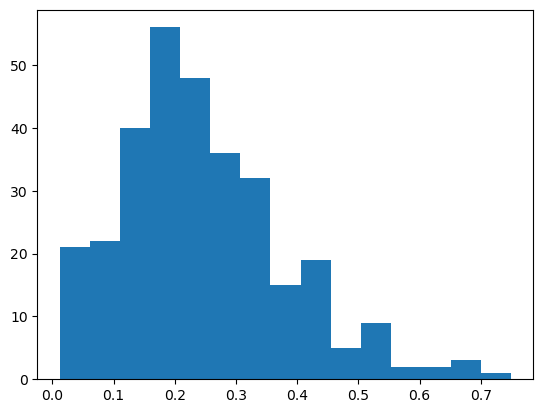

In [261]:

jsds = jsd(pred_normalised, labels)
plt.hist(jsds, bins=15)
plt.show()

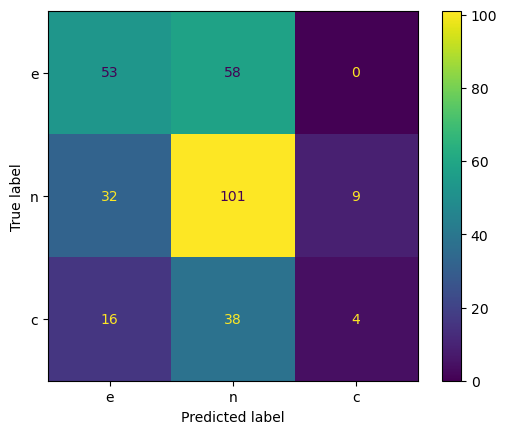

In [9]:
predicted_hard = np.argmax(pred_normalised, axis=1)
actual_hard = np.argmax(labels, axis=1)
confusion_matrix = metrics.confusion_matrix(actual_hard, predicted_hard)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['e', 'n', 'c'])
cm_display.plot()
plt.show()

In [12]:
path_names = [
    'predictions/sentence-transformers/all-MiniLM-L6-v2/',
    'predictions/sentence-transformers/roberta-base-nli-mean-tokens/',
    'predictions/sentence-transformers/all-mpnet-base-v2/',
    'predictions/mini_R2_soft_soft/',
    'predictions/robertaNLI_R2_soft_soft/',
    'predictions/mpnet_R2_soft_soft/',    
]


<Figure size 1400x700 with 0 Axes>

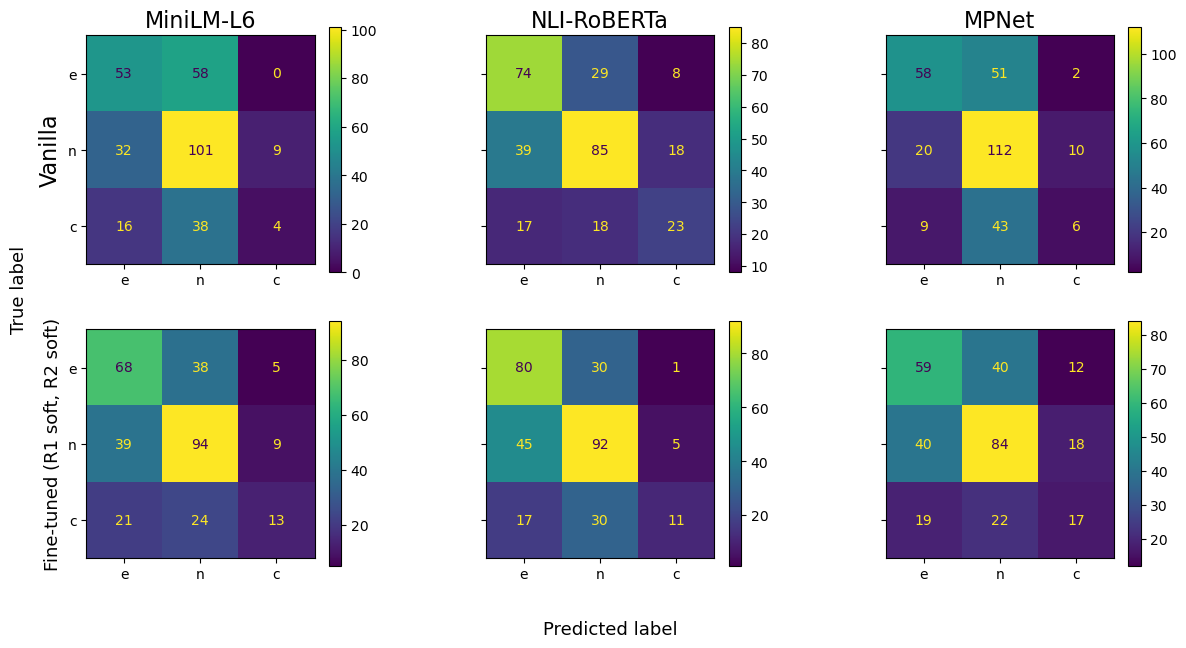

In [57]:

plt.figure(figsize=(14,7))
f, axes = plt.subplots(2, 3, figsize=(14, 7), sharey='all')
axes = axes.flatten()
for num, name in enumerate(path_names):
    with open(os.path.join(name,'preds.pkl'), 'rb') as f:
        predicted = pickle.load(f)
        predicted = np.squeeze(np.stack(predicted))
        f.close
    with open(os.path.join(path,'labels.pkl'), 'rb') as f:
        labels = pickle.load(f)
        labels = np.squeeze(np.stack(labels))
        f.close
    # chance = scipy.special.softmax(np.random.rand((311*3)).reshape((311,3)), axis=1)
    pred_normalised = scipy.special.softmax(predicted, axis=1)
    

    # plt.subplot(2,3,num+1)
    
    # if num==0:
    #     plt.title('MiniLM-L6', fontsize=16)
    #     plt.ylabel('Vanilla', fontsize=16)
    # if num==1:
    #     plt.title('NLI-RoBERTa', fontsize=16)
    # if num==2:
    #     plt.title('MPNet', fontsize=16)
    # if num == 3:
    #     plt.ylabel('Fine-tuned (R1 soft, R2 soft)', fontsize=13)
    
    predicted_hard = np.argmax(pred_normalised, axis=1)
    actual_hard = np.argmax(labels, axis=1)
    confusion_matrix = metrics.confusion_matrix(actual_hard, predicted_hard)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['e', 'n', 'c'])
    cm_display.plot(ax=axes[num])
    cm_display.ax_.set_xlabel('')
    cm_display.ax_.set_ylabel('')
    if num==0:
        cm_display.ax_.set_title('MiniLM-L6', fontsize=16)
        cm_display.ax_.set_ylabel('Vanilla', fontsize=16)
        # plt.ylabel('Vanilla')
    if num==1:
        cm_display.ax_.set_title('NLI-RoBERTa', fontsize=16)
    if num==2:
        cm_display.ax_.set_title('MPNet', fontsize=16)
        # plt.title('MPNet', fontsize=16)
    if num == 3:
        cm_display.ax_.set_ylabel('Fine-tuned (R1 soft, R2 soft)', fontsize=13)
        # plt.ylabel('Fine-tuned (R1 soft, R2 soft)', fontsize=13)


plt.text(-12, -0.5, 'True label', ha='left', rotation='vertical',fontsize=13)
plt.text(-5, 3.5, 'Predicted label', ha='left',fontsize=13)
plt.subplots_adjust(wspace=0.40, hspace=0.2)
plt.show()

In [269]:
confusion_matrix

array([[80, 30,  1],
       [45, 92,  5],
       [17, 30, 11]])